# Core Assignment: Describing Distributions
## Student: Joseph Lim

Analyze and Visualize different features to describe the provided medical dataset.

Features to analyze:
* VitD_levels (vitamin D levels)
* Doc_visits (# of visits to doctor)
* TotalCharge (total amount charged to patient)

## Importing and Inspecting Dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
#Setting pandas options to max column and row displays
pd.set_option('display.max_columns', None) #Used for displaying columns
pd.set_option('display.max_rows', None) #Used for displaying rows

In [3]:
df = pd.read_csv("data.csv")
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1.0,1.0,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0.0,0.0,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0.0,1.0,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0.0,NaN,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [4]:
#Checking for duplicates
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

In [6]:
#Checking for visible outliers
df.describe()

,Lat,Lng,Children,Age,Income,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,TotalCharge,Additional_charges
count,1000.000000,1000.000000,993.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,994.000000,994.00000,998.000000,992.000000,998.000000,994.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,38.989277,-91.165542,2.103726,54.084000,40653.044950,0.0,17.992381,4.992000,1.024000,0.366000,0.250000,0.415000,0.194000,0.716000,0.358149,0.28169,0.346693,0.414315,0.326653,0.396378,0.422000,0.308000,9.267176,3240.971613,13124.934863
std,5.504177,15.451957,2.239293,20.903203,28370.102213,0.0,2.056366,1.048349,1.013139,0.598667,0.433229,0.492969,0.395627,0.451162,0.479698,0.45005,0.476156,0.492852,0.469224,0.489391,0.494126,0.461898,6.030931,600.413722,6677.691402
min,18.010230,-171.688150,0.000000,18.000000,154.080000,0.0,11.475314,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.012586,2022.650007,3241.339760
25%,35.673860,-96.840598,0.000000,36.750000,19295.567500,0.0,16.620469,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.518085,2822.108670,8121.383834
50%,39.524835,-88.242890,1.000000,55.000000,34222.550000,0.0,18.020163,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.042516,3164.679245,11698.462430
75%,42.130840,-80.602785,3.000000,72.000000,54924.115000,0.0,19.418254,6.000000,2.000000,1.000000,0.250000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.711671,3628.550654,16493.908180
max,70.560990,-66.247510,10.000000,89.000000,204542.410000,0.0,24.565463,9.000000,7.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.269743,5572.846022,30087.650940


In [7]:
#Checking for missing values
print(df.isna().sum())
print(df.isna().sum()/len(df)*100)

State                 5
Lat                   0
Lng                   0
Area                  5
Children              7
Age                   0
Income                0
Marital               5
Gender                5
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         5
HighBlood             0
Stroke                0
Complication_risk     5
Overweight            0
Arthritis             6
Diabetes              6
Hyperlipidemia        2
BackPain              8
Anxiety               2
Allergic_rhinitis     6
Reflux_esophagitis    0
Asthma                0
Services              5
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64
State                 0.5
Lat                   0.0
Lng                   0.0
Area                  0.5
Children              0.7
Age                   0.0
Income                0.0
Marital               0.5
Gender     

In [8]:
# <2% missing data in all columns, removing missing values
df.dropna(inplace = True)
df.isna().sum()

State                 0
Lat                   0
Lng                   0
Area                  0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64

## Plotting histogram

* Plot histogram with KDE
* add a red line for the mean
* add a green line for the median
* add black lines denoting 1 standard deviation
* Highlight the ± 1 std region in yellow

### Histogram for Vitamin D levels

<AxesSubplot: title={'center': 'Vitamin D Level counts'}, xlabel='VitD_levels', ylabel='Count'>

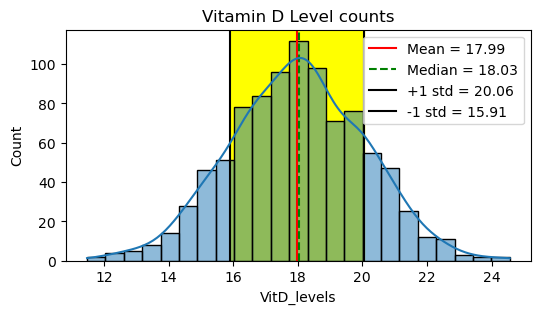

In [9]:
fig, ax = plt.subplots(figsize=(6,3))

mean = df["VitD_levels"].mean()
median = df["VitD_levels"].median()
std = df["VitD_levels"].std()
plus_one_std = mean + std
minus_one_std = mean - std

#Adding Title
ax.set_title("Vitamin D Level counts")
#Adding Mean
ax.axvline(mean, color = "red", label = f"Mean = {mean:,.2f}")
#Adding Median
ax.axvline(median, ls = "--", color = "green", label = f"Median = {median:,.2f}")
#Adding standard deviation lines
ax.axvline(plus_one_std, color = "black",label=f"+1 std = {plus_one_std:,.2f}")
ax.axvline(minus_one_std, color = "black", label = f"-1 std = {minus_one_std:,.2f}")
#Showing area within one standard deviation
ax.axvspan(plus_one_std, minus_one_std, color = "yellow", zorder = 0)
#Adding Legend
ax.legend()

sns.histplot(df["VitD_levels"], kde = True)

In [10]:
kurt = stats.kurtosis(df["VitD_levels"], fisher = False)

print(kurt)

2.9695105662535095


### Histogram for Doctor Visits

<AxesSubplot: title={'center': 'Number of Doctor Visits'}, xlabel='Doc_visits', ylabel='Count'>

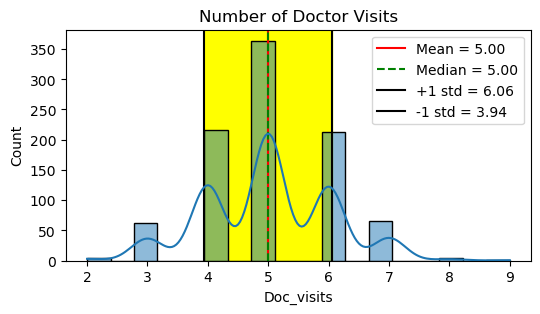

In [11]:
fig, ax = plt.subplots(figsize=(6,3))

mean = df["Doc_visits"].mean()
median = df["Doc_visits"].median()
std = df["Doc_visits"].std()
plus_one_std = mean + std
minus_one_std = mean - std

#Adding Title
ax.set_title("Number of Doctor Visits")
#Adding Mean
ax.axvline(mean, color = "red", label = f"Mean = {mean:,.2f}")
#Adding Median
ax.axvline(median, ls = "--", color = "green", label = f"Median = {median:,.2f}")
#Adding standard deviation lines
ax.axvline(plus_one_std, color = "black",label=f"+1 std = {plus_one_std:,.2f}")
ax.axvline(minus_one_std, color = "black", label = f"-1 std = {minus_one_std:,.2f}")
#Showing area within one standard deviation
ax.axvspan(plus_one_std, minus_one_std, color = "yellow", zorder = 0)
#Adding Legend
ax.legend()

sns.histplot(df["Doc_visits"], kde = True)

In [12]:
kurt = stats.kurtosis(df["Doc_visits"], fisher = False)

print(kurt)

2.9929701943807308


### Histogram for Total Charge

<AxesSubplot: title={'center': 'Total Charge'}, xlabel='TotalCharge', ylabel='Count'>

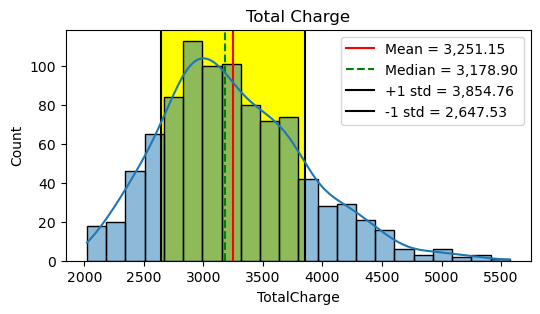

In [13]:
fig, ax = plt.subplots(figsize=(6,3))

mean = df["TotalCharge"].mean()
median = df["TotalCharge"].median()
std = df["TotalCharge"].std()
plus_one_std = mean + std
minus_one_std = mean - std

#Adding Title
ax.set_title("Total Charge")
#Adding Mean
ax.axvline(mean, color = "red", label = f"Mean = {mean:,.2f}")
#Adding Median
ax.axvline(median, ls = "--", color = "green", label = f"Median = {median:,.2f}")
#Adding standard deviation lines
ax.axvline(plus_one_std, color = "black",label=f"+1 std = {plus_one_std:,.2f}")
ax.axvline(minus_one_std, color = "black", label = f"-1 std = {minus_one_std:,.2f}")
#Showing area within one standard deviation
ax.axvspan(plus_one_std, minus_one_std, color = "yellow", zorder = 0)
#Adding Legend
ax.legend()

sns.histplot(df["TotalCharge"], kde = True)

In [14]:
kurt = stats.kurtosis(df["TotalCharge"], fisher = False)

print(kurt)

3.274018147040976


## Answering Questions

For each histogram:
* Is the histogram discrete or continuous?
* Is the histogram skewed? If so, in which direction?
* What type of kurtosis is displayed (mesokurtic, leptokurtic, platykurtic) ?

### Questions for Vitamin D Levels

The histogram is continuous. There is little to no skew. Kurtosis is ~2.97, therefore it is mesokurtic

### Questions for Doctor Visits

The histogram is discrete. There is little to no skew. Kurtosis is ~2.99, therefore it is mesokurtic.

### Questions for Total Charge

The histogram is continuous. There is positive skew. Kurtosis is ~3.27, therefore it is leptokurtic